In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus
from ipywidgets import *
from IPython.display import display
from IPython.display import Image
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["font.size"] = 14
import pgeocode

plt.style.use("ggplot")
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import scipy.stats as stats

# from pygeocoder import Geocoder
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
mm_scaler = MinMaxScaler()

In [2]:
austin = pd.read_pickle("../pickled_data/austin_all.pickled")
sanfran = pd.read_pickle("../pickled_data/sf_all_df.pickled")
# LA = pd.read_pickle("../pickled_data/LA_new_df.pickled")
# chicago = pd.read_pickle("../pickled_data/chicago_trips_df.pickled")
london = pd.read_pickle("../pickled_data/london_counts_df.pickled")
DC = pd.read_pickle("../pickled_data/DC_df.pickled")

In [4]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
mm_scaler = MinMaxScaler()

## Austin

In [5]:
def to_float(string):
    try:
        return float(string)
    except:
        return np.nan


austin_f = austin[
    ["TempAvgC", "HumidityAvgPercent", "WindAvgKmH", "is_workday", "dateasdatetime"]
]
austin_per_day = austin_f.groupby("dateasdatetime").mean()
austin_per_day["count"] = austin_f.dateasdatetime.value_counts()

austin_per_day["mm_normalised_count"] = mm_scaler.fit_transform(austin_per_day[['count']])
austin_per_day["robust_normalised_count"] = rob_scaler.fit_transform(austin_per_day[['count']])
austin_per_day["std_normalised_count"] = std_scaler.fit_transform(austin_per_day[['count']])
austin_per_day.rename(columns={"TempAvgC": "temp", "HumidityAvgPercent": "hum", "WindAvgKmH": "wind"},inplace=True,)
austin_per_day['City'] = 'Austin'
austin_per_day.head()

/Users/vilvaki/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/vilvaki/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vilvaki/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,temp,hum,wind,is_workday,count,mm_normalised_count,robust_normalised_count,std_normalised_count,City
dateasdatetime,,,,,,,,,
2013-12-21,15.555556,75.0,6.436,0,103,0.028971,-1.136364,-1.105853,Austin
2013-12-22,8.888889,68.0,9.654,0,117,0.033633,-1.087413,-1.068208,Austin
2013-12-23,7.222222,52.0,4.827,1,96,0.026640,-1.160839,-1.124675,Austin
2013-12-24,7.777778,56.0,6.436,1,85,0.022977,-1.199301,-1.154253,Austin
2013-12-25,10.000000,71.0,3.218,0,145,0.042957,-0.989510,-0.992919,Austin


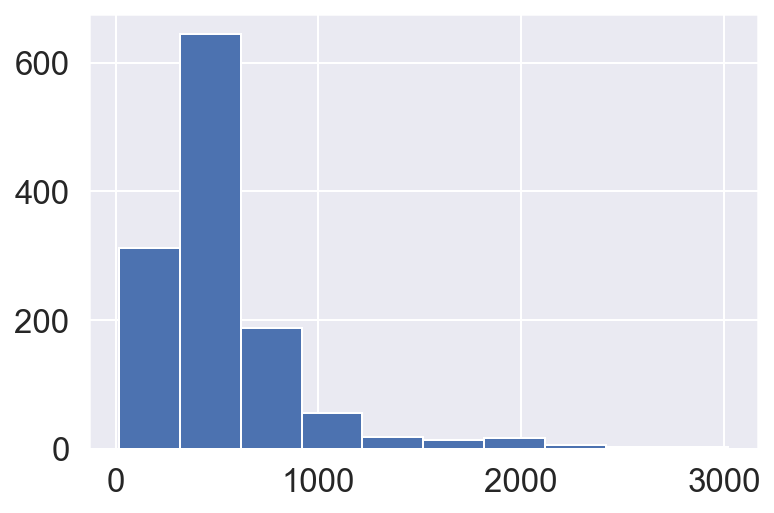

In [6]:
austin_per_day['count'].hist()

In [7]:
austin_per_day.corr()

,temp,hum,wind,is_workday,count,mm_normalised_count,robust_normalised_count,std_normalised_count
temp,1.000000,0.029538,0.039621,0.036201,0.172339,0.172339,0.172339,0.172339
hum,0.029538,1.000000,-0.005160,-0.081458,-0.055129,-0.055129,-0.055129,-0.055129
wind,0.039621,-0.005160,1.000000,0.019336,-0.060519,-0.060519,-0.060519,-0.060519
is_workday,0.036201,-0.081458,0.019336,1.000000,-0.311814,-0.311814,-0.311814,-0.311814
count,0.172339,-0.055129,-0.060519,-0.311814,1.000000,1.000000,1.000000,1.000000
mm_normalised_count,0.172339,-0.055129,-0.060519,-0.311814,1.000000,1.000000,1.000000,1.000000
robust_normalised_count,0.172339,-0.055129,-0.060519,-0.311814,1.000000,1.000000,1.000000,1.000000
std_normalised_count,0.172339,-0.055129,-0.060519,-0.311814,1.000000,1.000000,1.000000,1.000000


In [8]:
austin_per_day['count'][austin_per_day.is_workday == 1].mean()

435.76566125290026

In [9]:
austin_per_day.head()

,temp,hum,wind,is_workday,count,mm_normalised_count,robust_normalised_count,std_normalised_count,City
dateasdatetime,,,,,,,,,
2013-12-21,15.555556,75.0,6.436,0,103,0.028971,-1.136364,-1.105853,Austin
2013-12-22,8.888889,68.0,9.654,0,117,0.033633,-1.087413,-1.068208,Austin
2013-12-23,7.222222,52.0,4.827,1,96,0.026640,-1.160839,-1.124675,Austin
2013-12-24,7.777778,56.0,6.436,1,85,0.022977,-1.199301,-1.154253,Austin
2013-12-25,10.000000,71.0,3.218,0,145,0.042957,-0.989510,-0.992919,Austin


## SF

In [10]:
sf_f = sanfran[
    ["mean_temperature_c", "mean_humidity", "mean_wind_speed_kmh", "is_workday"]
]
sf_per_day = sf_f.groupby([sanfran["start_date"].dt.date]).mean()

sf_per_day["count"] = sf_f.groupby([sanfran["start_date"].dt.date]).count()[
    "mean_temperature_c"
]
sf_per_day["std_normalised_count"] = std_scaler.fit_transform(sf_per_day[['count']])
sf_per_day["mm_normalised_count"] = mm_scaler.fit_transform(sf_per_day[['count']])
sf_per_day["robust_normalised_count"] = rob_scaler.fit_transform(sf_per_day[['count']])
sf_per_day['City']='San Francisco'
sf_per_day.rename(
    columns={
        "mean_temperature_c": "temp",
        "mean_humidity": "hum",
        "mean_wind_speed_kmh": "wind",
    },
    inplace=True,
)
sf_per_day.head()

/Users/vilvaki/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vilvaki/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/vilvaki/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,temp,hum,wind,is_workday,count,std_normalised_count,mm_normalised_count,robust_normalised_count,City
start_date,,,,,,,,,
2013-08-29,21.333333,73.2,11.9066,1,748,-0.412292,0.464808,-0.365644,San Francisco
2013-08-30,22.777778,68.8,9.0104,1,714,-0.496742,0.441115,-0.407362,San Francisco
2013-08-31,20.000000,70.8,11.9066,0,640,-0.680545,0.389547,-0.498160,San Francisco
2013-09-01,21.111111,66.8,11.5848,0,706,-0.516612,0.435540,-0.417178,San Francisco
2013-09-02,21.555556,74.0,11.9066,1,661,-0.628385,0.404181,-0.472393,San Francisco


In [11]:
sf_per_day.corr()

,temp,hum,wind,is_workday,count,std_normalised_count,mm_normalised_count,robust_normalised_count
temp,1.000000,-0.135934,0.390774,0.036829,0.252210,0.252210,0.252210,0.252210
hum,-0.135934,1.000000,0.040298,-0.036036,-0.116900,-0.116900,-0.116900,-0.116900
wind,0.390774,0.040298,1.000000,0.036688,0.061293,0.061293,0.061293,0.061293
is_workday,0.036829,-0.036036,0.036688,1.000000,0.849128,0.849128,0.849128,0.849128
count,0.252210,-0.116900,0.061293,0.849128,1.000000,1.000000,1.000000,1.000000
std_normalised_count,0.252210,-0.116900,0.061293,0.849128,1.000000,1.000000,1.000000,1.000000
mm_normalised_count,0.252210,-0.116900,0.061293,0.849128,1.000000,1.000000,1.000000,1.000000
robust_normalised_count,0.252210,-0.116900,0.061293,0.849128,1.000000,1.000000,1.000000,1.000000


In [12]:
sf_per_day['count'][sf_per_day.is_workday == 0].mean()

405.2105263157895

## London

In [13]:
london_f = london[["t1", "hum", "wind_speed", "is_workday"]]
london_per_day = london_f.groupby([london["timestamp"].dt.date]).mean()
london_per_day["count"] = (
    london["cnt"].groupby([london["timestamp"].dt.date]).sum()
)
london_per_day.rename(columns={"t1": "temp", "wind_speed": "wind"}, inplace=True)
london_per_day["std_normalised_count"] = std_scaler.fit_transform(
    london_per_day[["count"]]
)
london_per_day["mm_normalised_count"] = mm_scaler.fit_transform(london_per_day[['count']])
london_per_day["robust_normalised_count"] = rob_scaler.fit_transform(london_per_day[['count']])
london_per_day['City']='London'
london_per_day.head()

/Users/vilvaki/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vilvaki/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/vilvaki/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,temp,hum,wind,is_workday,count,std_normalised_count,mm_normalised_count,robust_normalised_count,City
timestamp,,,,,,,,,
2015-01-04,2.479167,94.270833,7.500000,0.0,9234,-2.096590,0.064538,-1.547148,London
2015-01-05,8.041667,80.312500,8.854167,1.0,20372,-0.801745,0.229216,-0.577825,London
2015-01-06,7.854167,78.895833,16.000000,1.0,20613,-0.773728,0.232779,-0.556851,London
2015-01-07,7.456522,78.108696,19.760870,1.0,21064,-0.721297,0.239447,-0.517601,London
2015-01-08,9.750000,79.312500,20.479167,1.0,15601,-1.356396,0.158675,-0.993038,London


In [14]:
london_per_day['count'][london_per_day.is_workday == 1].mean()

29213.30297029703

## DC

In [15]:
DC_f = DC[["temp", "humidity", "windspeed", "workingday"]]
dc_per_day = DC_f.groupby([DC["datetime"].dt.date]).mean()
dc_per_day["count"] = (DC["count"].groupby([DC["datetime"].dt.date]).sum())
dc_per_day.rename(columns={"humidity": "hum", "windspeed": "wind",'workingday':'is_workday'}, inplace=True)
dc_per_day["std_normalised_count"] = std_scaler.fit_transform(dc_per_day[["count"]])
dc_per_day["mm_normalised_count"] = mm_scaler.fit_transform(dc_per_day[['count']])
dc_per_day["robust_normalised_count"] = rob_scaler.fit_transform(dc_per_day[['count']])
dc_per_day['City']='DC'
dc_per_day.head()

/Users/vilvaki/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vilvaki/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/vilvaki/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,temp,hum,wind,is_workday,count,std_normalised_count,mm_normalised_count,robust_normalised_count,City
datetime,,,,,,,,,
2011-01-01,14.110833,80.583333,10.749871,0.0,985,-1.922340,0.046862,-1.342468,DC
2011-01-02,14.902609,69.608696,16.652122,0.0,801,-2.020910,0.024171,-1.411074,DC
2011-01-03,8.050909,43.727273,16.636709,1.0,1349,-1.727342,0.091750,-1.206749,DC
2011-01-04,8.200000,59.043478,10.739809,1.0,1562,-1.613236,0.118017,-1.127330,DC
2011-01-05,9.305217,43.695652,12.522300,1.0,1600,-1.592880,0.122703,-1.113162,DC


In [16]:
dc_per_day.corr()

,temp,hum,wind,is_workday,count,std_normalised_count,mm_normalised_count,robust_normalised_count
temp,1.000000,0.146933,-0.163716,0.028408,0.610687,0.610687,0.610687,0.610687
hum,0.146933,1.000000,-0.305684,-0.014252,-0.077046,-0.077046,-0.077046,-0.077046
wind,-0.163716,-0.305684,1.000000,0.020647,-0.235932,-0.235932,-0.235932,-0.235932
is_workday,0.028408,-0.014252,0.020647,1.000000,0.020870,0.020870,0.020870,0.020870
count,0.610687,-0.077046,-0.235932,0.020870,1.000000,1.000000,1.000000,1.000000
std_normalised_count,0.610687,-0.077046,-0.235932,0.020870,1.000000,1.000000,1.000000,1.000000
mm_normalised_count,0.610687,-0.077046,-0.235932,0.020870,1.000000,1.000000,1.000000,1.000000
robust_normalised_count,0.610687,-0.077046,-0.235932,0.020870,1.000000,1.000000,1.000000,1.000000


In [52]:
dc_per_day.shape

(456, 9)

In [17]:
dc_per_day['count'][dc_per_day.is_workday == 0].mean()

4516.358620689655

# ALL - CONCAT

In [18]:
pred_df = pd.concat([austin_per_day, dc_per_day,london_per_day,sf_per_day], ignore_index=True)
# pred_df.to_excel('toto.xlsx')
pred_df_no_austin = pd.concat([dc_per_day,london_per_day,sf_per_day], ignore_index=True)


/Users/vilvaki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [19]:
pred_df.dropna(inplace=True)
pred_df_no_austin.dropna(inplace=True)

In [20]:
print(pred_df.shape)
# print(pred_df_no_austin.shape)

(3173, 9)


In [21]:
dummied = pd.get_dummies(pred_df, drop_first=True)
dummied.shape

(3173, 11)

In [22]:
dummied.head(2)

,count,hum,is_workday,mm_normalised_count,robust_normalised_count,std_normalised_count,temp,wind,City_DC,City_London,City_San Francisco
0,103,75.0,0.0,0.028971,-1.136364,-1.105853,15.555556,6.436,0,0,0
1,117,68.0,0.0,0.033633,-1.087413,-1.068208,8.888889,9.654,0,0,0


In [23]:
pred_df.corr()

,count,hum,is_workday,mm_normalised_count,robust_normalised_count,std_normalised_count,temp,wind
count,1.000000,0.113147,0.064180,0.124481,0.124626,0.211498,-0.288130,0.448253
hum,0.113147,1.000000,-0.051633,-0.121838,-0.135915,-0.161249,-0.127159,-0.004043
is_workday,0.064180,-0.051633,1.000000,0.198488,-0.004237,0.152846,0.024978,0.012095
mm_normalised_count,0.124481,-0.121838,0.198488,1.000000,0.444544,0.695459,0.049374,0.057589
robust_normalised_count,0.124626,-0.135915,-0.004237,0.444544,1.000000,0.919900,0.319129,-0.122969
std_normalised_count,0.211498,-0.161249,0.152846,0.695459,0.919900,1.000000,0.297820,-0.085752
temp,-0.288130,-0.127159,0.024978,0.049374,0.319129,0.297820,1.000000,-0.197137
wind,0.448253,-0.004043,0.012095,0.057589,-0.122969,-0.085752,-0.197137,1.000000


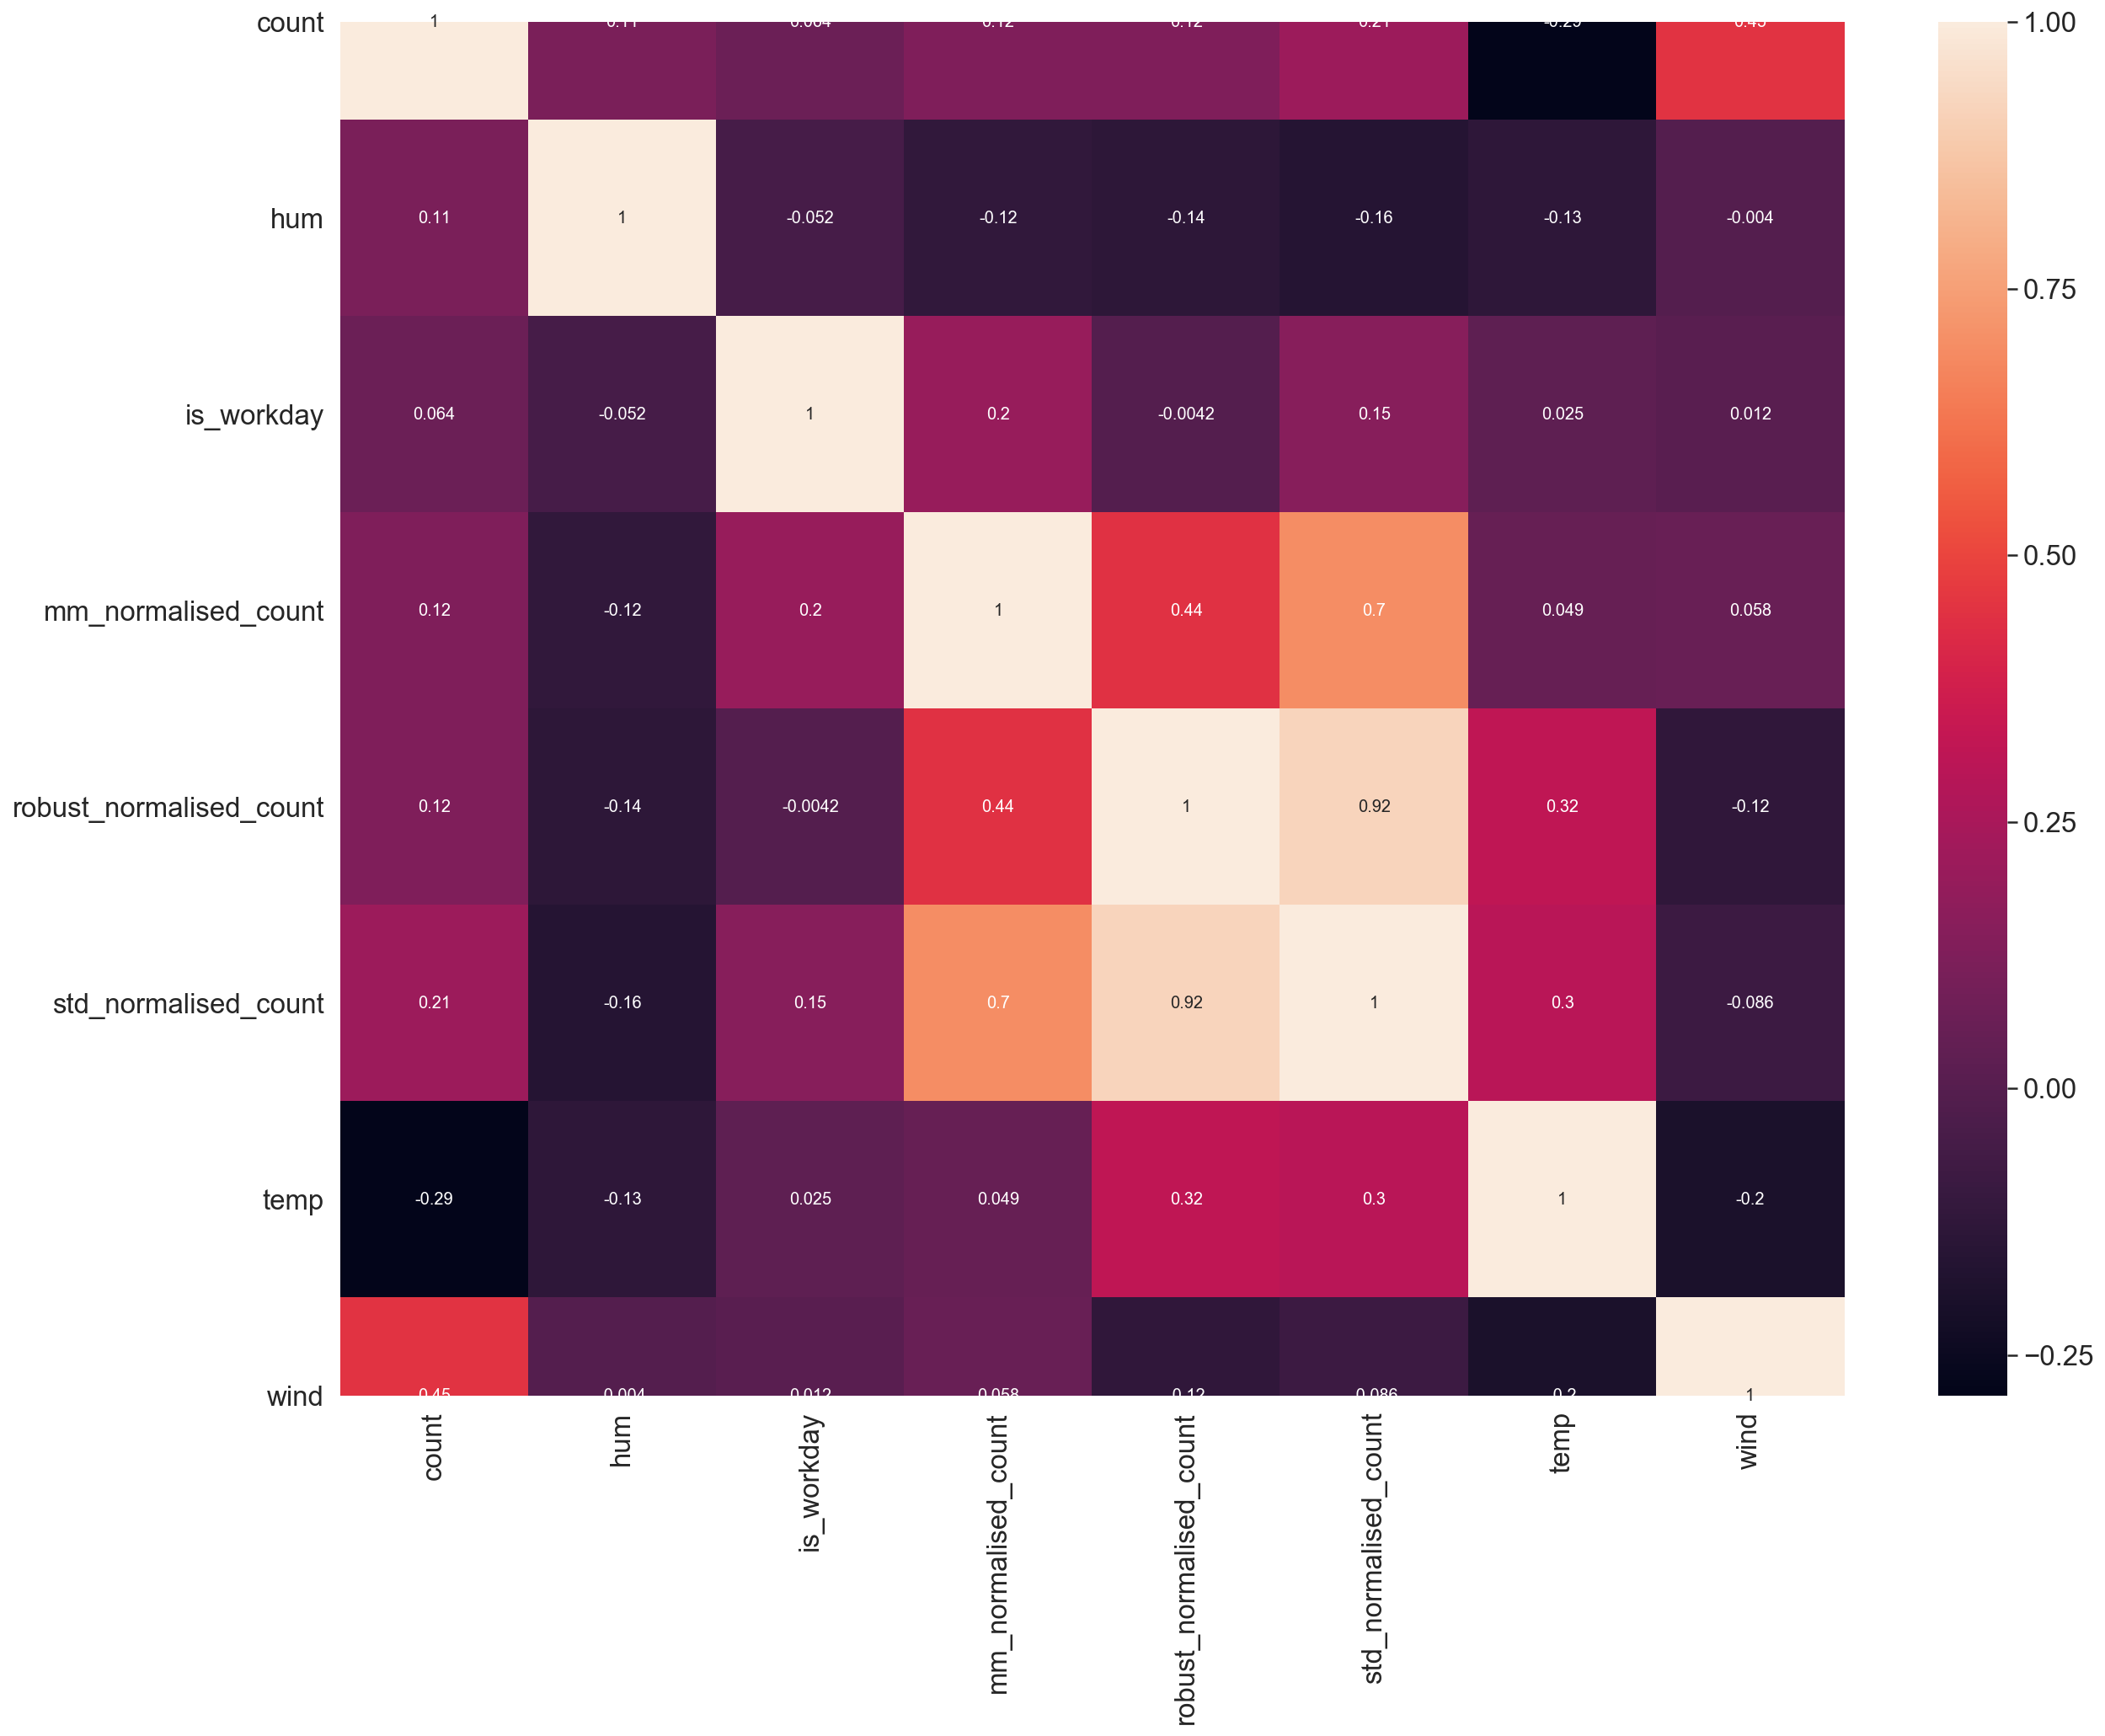

In [24]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(pred_df.corr(), annot=True, ax=ax)
plt.show()

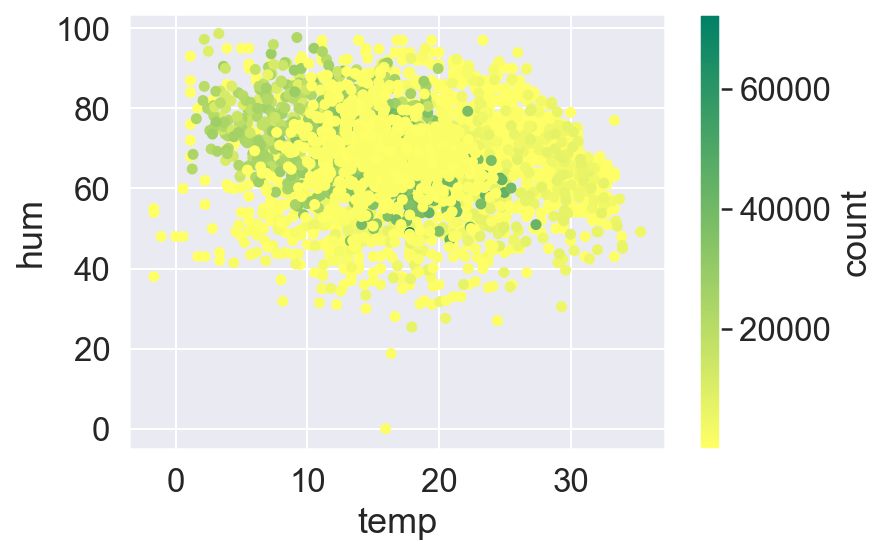

In [25]:
fig, ax = plt.subplots(sharex=False)
pred_df.plot(kind='scatter', x='temp', y='hum', c='count', colormap='summer_r',ax=ax);

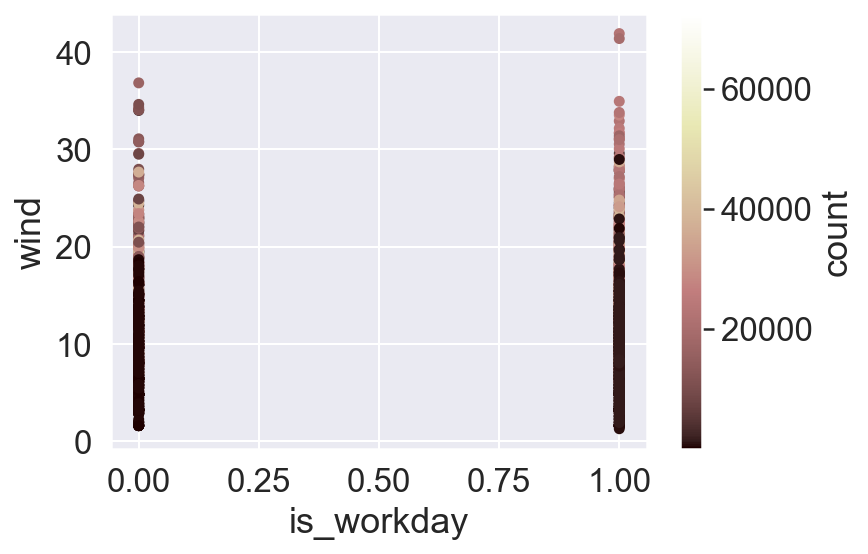

In [26]:
fig, ax = plt.subplots(sharex=False)
pred_df.plot(kind='scatter', x='is_workday', y='wind', c='count', colormap='pink',ax=ax);

# ===========================

# std_normalised_count as  target

In [27]:
# pred_df_2 = pred_df.copy()
# del pred_df_2['count']
# del pred_df_2['robust_normalised_count']
# del pred_df_2['std_normalised_count']
# y = pred_df_2.pop('mm_normalised_count')
# X = pred_df_2
dummied_cp = dummied.copy()
del dummied_cp['count']
del dummied_cp['robust_normalised_count']
del dummied_cp['std_normalised_count']
y = dummied_cp.pop('mm_normalised_count')
X = dummied_cp

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [29]:
X_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(std_scaler.transform(X_test), columns=X.columns)

/Users/vilvaki/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vilvaki/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/vilvaki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  


# Linear regression:

In [30]:
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

lr.fit(X_train, y_train)
print("Training Score:", lr.score(X_train, y_train))
print("Test Score:", lr.score(X_test, y_test))

Cross-validated training scores: [0.53039479 0.51067194 0.52878918 0.531009   0.58904447]
Mean cross-validated training score: 0.5379818775803926
Training Score: 0.5431947714432629
Test Score: 0.5755678540949889


# Ridge:

In [31]:
# Fit RidgeCV model:
r_cv = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
r_cv.fit(X_train, y_train)
# get the optimal alpha:
print('Best alpha:', r_cv.alpha_)

Best alpha: 2.782559402207126


In [32]:
rg = Ridge(alpha=r_cv.alpha_)

scores = cross_val_score(rg, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

rg.fit(X_train, y_train)
print("Training Score:", rg.score(X_train, y_train))
print("Test Score:", rg.score(X_test, y_test))

Cross-validated training scores: [0.53019527 0.510786   0.52876596 0.53140681 0.58880685]
Mean cross-validated training score: 0.537992174532024
Training Score: 0.5431904703472867
Test Score: 0.5754202387386037


# Lasso:

In [33]:
# Fit LassoCV model:
l_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)
l_cv.fit(X_train, y_train)
# get the optimal alpha
print('Best alpha:', l_cv.alpha_)
print('Training score:', l_cv.score(X_train, y_train))
print("Test Score:", l_cv.score(X_test, y_test))

Best alpha: 0.0001
Training score: 0.5431916662034315
Test Score: 0.5754328669512071


In [34]:
lasso = Lasso(alpha=l_cv.alpha_)
scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

lasso.fit(X_train, y_train)
print("Training Score:", lasso.score(X_train, y_train))
print("Test Score:", lasso.score(X_test, y_test))

Cross-validated training scores: [0.53028823 0.51071729 0.5287141  0.53124597 0.58895084]
Mean cross-validated training score: 0.537983286934125
Training Score: 0.5431916662034315
Test Score: 0.5754328669512071


In [35]:
df_coef = pd.DataFrame(lasso.coef_, index=X_train.columns,
                       columns=['coefficients'])
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.sort_values(by='coefficients', ascending=False)

,coefficients,coef_abs
City_San Francisco,0.197564,0.197564
City_London,0.121529,0.121529
City_DC,0.120032,0.120032
temp,0.067086,0.067086
is_workday,0.048686,0.048686
wind,-0.021573,0.021573
hum,-0.023152,0.023152


# regressor

In [36]:
regressor = DecisionTreeRegressor(criterion='mse',
                                  max_depth=None, 
                                  random_state=1)

regressor.fit(X_train, y_train)
print("Train score: ", regressor.score(X_train, y_train))
print("Train CV score: ", cross_val_score(regressor, X_train, y_train, cv=5).mean())
print("Test score: ", regressor.score(X_test, y_test))

Train score:  0.997741464601657
Train CV score:  0.6190642068866499
Test score:  0.6463618901149757


In [37]:
gs_params ={
    'max_depth': list(range(1, 11))+[None],
    'max_features': [None, 1, 2, 3],
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]
}
lr_gridsearch = GridSearchCV(regressor , gs_params ,return_train_score=True,  cv=10)
lr_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'max_features': [None, 1, 2, 3], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [38]:
pd.DataFrame(lr_gridsearch.cv_results_).head()
print(lr_gridsearch.best_estimator_)
print(lr_gridsearch.best_score_)
print(lr_gridsearch.score(X_test, y_test))

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=50, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')
0.767030198298856
0.7819178604063555


# ===============================

# classification:

In [39]:
dummied.drop([x for x in dummied.columns if '_count' in x], axis=1, inplace=True)

In [40]:
mean_count = dummied['count'].mean()
list_bin = []
for val in dummied['count']:
    if val > mean_count:
        list_bin.append(1)
    else:
        list_bin.append(0)
        
dummied['count_class'] = list_bin

In [41]:
dummied.count_class.value_counts(normalize=True).max()

0.75795776867318

In [42]:
dummied_cp.shape

(3173, 7)

In [43]:
dummied_cp = dummied.copy()
del dummied_cp['count']
y = dummied_cp.pop("count_class")
X = dummied_cp

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    stratify=y, random_state=1)

In [44]:
classifier = DecisionTreeClassifier(criterion='gini',
                                    max_depth=3, 
                                    random_state=42)
classifier.fit(X_train, y_train)
print("Train score: ", classifier.score(X_train, y_train))
print("Train CV score: ", cross_val_score(classifier, X_train, y_train, cv=5).mean())
print("Test score: ", classifier.score(X_test, y_test))

Train score:  0.987785657998424
Train CV score:  0.9870000933677756
Test score:  0.9795275590551181


In [45]:
X_train.head()

,hum,is_workday,temp,wind,City_DC,City_London,City_San Francisco
2444,68.800000,1.0,22.777778,9.010400,0,0,1
1273,53.750000,0.0,7.209167,12.999117,1,0,0
1730,84.270833,1.0,3.041667,14.729167,0,1,0
1466,52.458333,1.0,12.812500,14.750608,1,0,0
1409,63.916667,1.0,26.855000,9.500321,1,0,0


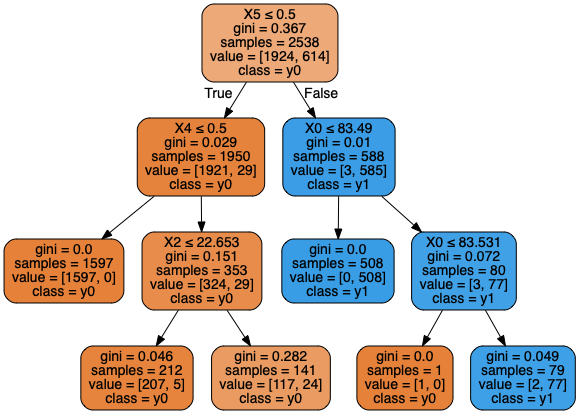

In [46]:
dot_data = StringIO()
export_graphviz(classifier,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                class_names=True
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [47]:
feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   index=X.columns,
                                   columns=['importance'])

feature_importances.sort_values(by='importance', ascending=False)

,importance
City_London,0.989043
City_DC,0.004447
temp,0.004150
hum,0.002360
is_workday,0.000000
wind,0.000000
City_San Francisco,0.000000


In [48]:
g_params = {'max_depth':list(range(1, 11))+[None],'max_features':[None, 1, 2, 3],'max_leaf_nodes':[None,2,3,4],
             'min_samples_leaf':[2,3,4, 5, 10, 15, 20, 25, 30, 40, 50],'min_samples_split':[2,3]}




gridsearch = GridSearchCV(classifier , g_params ,  cv=10, return_train_score=True, verbose=1)
gridsearch.get_params().keys()
gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 3872 candidates, totalling 38720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 38720 out of 38720 | elapsed:  4.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'max_features': [None, 1, 2, 3], 'max_leaf_nodes': [None, 2, 3, 4], 'min_samples_leaf': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'min_samples_split': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [49]:
pd.DataFrame(gridsearch.cv_results_).head()
print(gridsearch.best_estimator_)
print('Score:', gridsearch.best_score_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
Score: 0.987785657998424


In [50]:
gridsearch.score(X_test, y_test)

0.9826771653543307

In [51]:
gridsearch.best_params_

{'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 20,
 'min_samples_split': 2}